In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# 머신러닝을 지원하는 sklearn 라이브러리 가져오기
from sklearn.neighbors import KNeighborsClassifier
# 평가 지표들을 활용할 수 있는 metrics 모듈을 불러오기
from sklearn import metrics
import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split#학습 평가 데이터 분리
import seaborn as sns #matplot과 유사하게 시각화 라이브러리이지만 좀 더 깔끔함
from sklearn.datasets import load_iris #붓꽃
from sklearn.tree import DecisionTreeClassifier #트리
# !pip install seaborn
# 손쉽게 레이블 인코딩을 하기 위해 레이블인코더를 임포트
from sklearn.preprocessing import LabelEncoder
#!pip install graphviz #시각화 외부라이브러리
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler #StandardScaler
from sklearn.preprocessing import MinMaxScaler  #MinMaxScaler
from sklearn.datasets import load_breast_cancer
#!pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install 목차보기
from sklearn.model_selection import cross_val_score#교차검증 적용을 위해 임포트
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier #앙상블 모델

In [2]:
train = pd.read_csv("data/train1.csv", index_col="ID") 
test = pd.read_csv("data/test1.csv", index_col="ID")

In [3]:
train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,C,Ship,2.0,2,135,3.0,low,M,NaN,1339,1
2,F,Flight,5.0,3,225,5.0,low,F,6.0,1082,0
3,F,Ship,3.0,1,229,3.0,low,M,NaN,4971,1
4,F,Ship,3.0,2,228,NaN,medium,M,2.0,5640,0
5,D,Flight,NaN,1,195,6.0,high,F,NaN,4944,1
...,...,...,...,...,...,...,...,...,...,...,...
6995,D,Ship,4.0,2,232,5.0,medium,F,4.0,1783,0
6996,F,Ship,3.0,5,228,2.0,medium,F,NaN,5208,0
6997,D,Ship,NaN,1,300,5.0,low,F,10.0,1787,0


In [4]:
test

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
ID,,,,,,,,,,
7000,F,Ship,3.0,1,274,NaN,high,M,NaN,4352
7001,F,Ship,3.0,4,136,2.0,medium,F,NaN,1056
7002,A,Flight,NaN,5,140,3.0,low,F,7.0,5383
7003,C,Ship,NaN,1,291,4.0,low,F,NaN,1880
7004,F,?,4.0,2,147,3.0,low,F,5.0,5174
...,...,...,...,...,...,...,...,...,...,...
10995,A,?,4.0,1,204,4.0,?,F,NaN,1667
10996,C,Ship,NaN,3,195,2.0,medium,M,NaN,3869
10997,B,Flight,NaN,3,206,2.0,medium,M,7.0,4531


In [5]:
train.keys()

Index(['Warehouse_block ', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [6]:
test.keys()

Index(['Warehouse_block ', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')

In [7]:
print(train.shape)
print(test.shape)

(6999, 11)
(4000, 10)


In [8]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  5423 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6049 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     3468 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 656.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------       

In [9]:
train["Mode_of_Shipment"]

ID
1          Ship
2        Flight
3          Ship
4          Ship
5        Flight
         ...   
6995       Ship
6996       Ship
6997       Ship
6998       Road
6999       Ship
Name: Mode_of_Shipment, Length: 6999, dtype: object

- train 결측치
-  Customer_care_calls, Prior_purchases, Discount_offered

- test 결측치
- Customer_care_calls,Prior_purchases,  Discount_offered

In [10]:
train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,C,Ship,2.0,2,135,3.0,low,M,NaN,1339,1
2,F,Flight,5.0,3,225,5.0,low,F,6.0,1082,0
3,F,Ship,3.0,1,229,3.0,low,M,NaN,4971,1
4,F,Ship,3.0,2,228,NaN,medium,M,2.0,5640,0
5,D,Flight,NaN,1,195,6.0,high,F,NaN,4944,1
...,...,...,...,...,...,...,...,...,...,...,...
6995,D,Ship,4.0,2,232,5.0,medium,F,4.0,1783,0
6996,F,Ship,3.0,5,228,2.0,medium,F,NaN,5208,0
6997,D,Ship,NaN,1,300,5.0,low,F,10.0,1787,0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  5423 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6049 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     3468 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 656.2+ KB


In [12]:
train["Weight_in_gms"].unique()

array(['1339', '1082', '4971', ..., '4075', '2486', '1480'], dtype=object)

In [13]:
train["Discount_offered"].mean()

13.269031141868512

In [14]:
test["Prior_purchases"] = test["Prior_purchases"].fillna(0)

In [15]:
train["Prior_purchases"] = train["Prior_purchases"].fillna(0)

In [16]:
test["Discount_offered"] = test["Discount_offered"].fillna(13)

In [17]:
train["Discount_offered"] = train["Discount_offered"].fillna(13)

In [18]:
test["Customer_care_calls"] = test["Customer_care_calls"].fillna(3)

In [19]:
train["Customer_care_calls"] = train["Customer_care_calls"].fillna(3)

In [20]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     6999 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 656.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------       

In [21]:
test

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
ID,,,,,,,,,,
7000,F,Ship,3.0,1,274,0.0,high,M,13.0,4352
7001,F,Ship,3.0,4,136,2.0,medium,F,13.0,1056
7002,A,Flight,3.0,5,140,3.0,low,F,7.0,5383
7003,C,Ship,3.0,1,291,4.0,low,F,13.0,1880
7004,F,?,4.0,2,147,3.0,low,F,5.0,5174
...,...,...,...,...,...,...,...,...,...,...
10995,A,?,4.0,1,204,4.0,?,F,13.0,1667
10996,C,Ship,3.0,3,195,2.0,medium,M,13.0,3869
10997,B,Flight,3.0,3,206,2.0,medium,M,7.0,4531


### 데이터 전처리

In [22]:
train.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.015652,0.046637,0.092780,-0.095014,-0.070801
Customer_rating,0.015652,1.000000,-0.001961,-0.002233,-0.007780,0.011275
Cost_of_the_Product,0.046637,-0.001961,1.000000,0.028297,-0.023089,-0.012811
Prior_purchases,0.092780,-0.002233,0.028297,1.000000,-0.039500,-0.032579
Discount_offered,-0.095014,-0.007780,-0.023089,-0.039500,1.000000,0.279644
Reached.on.Time_Y.N,-0.070801,0.011275,-0.012811,-0.032579,0.279644,1.000000


- Customer_care_calls 채우기

In [23]:
pt1 = train.pivot_table(values="Customer_care_calls", # 데이터로 사용될 열(컬럼)을 지정
                        index = ["Prior_purchases", "Mode_of_Shipment"],#멀티인덱스 설정 
                        aggfunc="count", # 데이터 요약시 사용하는 함수를 지정,mean, sum, count
                       )
pt1

Customer_care_calls
Prior_purchases Mode_of_Shipment                     
0.0              Flight                           124
                 Road                             156
                 Ship                             624
                ?                                  46
2.0              Flight                           205
                 Road                             210
                 Ship                             925
                ?                                  83
3.0              Flight                           317
                 Road                             341
                 Roadzk                             1
                 Ship                            1401
                 Shipzk                             1
                ?                                 115
4.0              Flight                           176
                 Flightzk                           1
                 Road                             156
                 Ship                             785
                ?                                  44
5.0              Flight                           138
                 Road                             106
                 Ship                             441
                 Shipzk                             1
                ?                                  49
6.0              Flight                            48
                 Road                              62
                 Ship                             182
                ?                                  18
7.0              Flight                            10
                 Road                              13
                 Ship                              40
                ?                                   7
8.0              Flight                             9
                 Road                              12
                 Ship                              47
                ?                                   4
10.0             Flight                            12
                 Road                              19
                 Ship                              63
                ?                                   7

In [24]:
train["Customer_care_calls"] = train["Customer_care_calls"].fillna("3")

In [25]:
train["Customer_care_calls"]

ID
1       2.0
2       5.0
3       3.0
4       3.0
5       3.0
       ... 
6995    4.0
6996    3.0
6997    3.0
6998    3.0
6999    3.0
Name: Customer_care_calls, Length: 6999, dtype: float64

- def함수를 이용해 결측치를 채워보자

In [26]:
def fill_calls(data) :  # 매개변수 data에는 train 혹은 test가 들어가게 됨
    
    if pd.isna(data["Customer_care_calls"]) :
        # 위 피벗테이블에서 만든 값을 리턴
        return pt1.loc[data["pr"], data["Mode_of_Shipment"]]
    else :
        return data["Customer_care_calls"]

In [27]:
train["Customer_care_calls"]

ID
1       2.0
2       5.0
3       3.0
4       3.0
5       3.0
       ... 
6995    4.0
6996    3.0
6997    3.0
6998    3.0
6999    3.0
Name: Customer_care_calls, Length: 6999, dtype: float64

In [28]:
pd.set_option("display.max_rows", None)

In [29]:
train["Weight_in_gms"]

ID
1       1339
2       1082
3       4971
4       5640
5       4944
6       1683
7       1417
8       5804
9       5979
10      5555
11      2960
12      5496
13      2835
14      5653
15      4331
16      5338
17      4112
18      5435
19      4524
20      4518
21      1088
22      5546
23      4106
24      2229
25      5502
26      5754
27      3788
28      4104
29      3722
30      1078
31      2718
32      1556
33      1310
34      1071
35      4864
36      5672
37      4057
38      1233
39      5896
40      3905
41      1479
42      5632
43      3609
44      1577
45      1051
46      1540
47      1594
48         ?
49      1918
50      4794
51      4861
52      1165
53      1399
54      3516
55      1831
56      1944
57      5024
58      4074
59      4925
60      1176
61      4733
62      4705
63      2791
64      1717
65      3131
66         ?
67      2522
68         ?
69      2960
70      4735
71      1352
72      5254
73      4442
74      1778
75      4410
76      1321
77      2

In [30]:
weight = train["Weight_in_gms"]

In [31]:
convert_weight = [1339, 1082, 4971, 4075, 2486, 1480, 1787, 5208, 1294, 4013] + [2500] * 6989
convert_weight

[1339,
 1082,
 4971,
 4075,
 2486,
 1480,
 1787,
 5208,
 1294,
 4013,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,

In [32]:
weight_dict = dict(zip(weight, convert_weight))
weight_dict

{'1339': 2500,
 '1082': 2500,
 '4971': 2500,
 '5640': 2500,
 '4944': 2500,
 '1683': 1480,
 '1417': 2500,
 '5804': 2500,
 '5979': 2500,
 '5555': 2500,
 '2960': 2500,
 '5496': 2500,
 '2835': 2500,
 '5653': 2500,
 '4331': 2500,
 '5338': 2500,
 '4112': 2500,
 '5435': 2500,
 '4524': 2500,
 '4518': 2500,
 '1088': 2500,
 '5546': 2500,
 '4106': 2500,
 '2229': 2500,
 '5502': 2500,
 '5754': 2500,
 '3788': 2500,
 '4104': 2500,
 '3722': 2500,
 '1078': 2500,
 '2718': 2500,
 '1556': 2500,
 '1310': 2500,
 '1071': 2500,
 '4864': 2500,
 '5672': 2500,
 '4057': 2500,
 '1233': 2500,
 '5896': 2500,
 '3905': 2500,
 '1479': 2500,
 '5632': 2500,
 '3609': 2500,
 '1577': 2500,
 '1051': 2500,
 '1540': 2500,
 '1594': 2500,
 '?': 2500,
 '1918': 2500,
 '4794': 2500,
 '4861': 2500,
 '1165': 2500,
 '1399': 2500,
 '3516': 2500,
 '1831': 2500,
 '1944': 2500,
 '5024': 2500,
 '4074': 2500,
 '4925': 2500,
 '1176': 2500,
 '4733': 2500,
 '4705': 2500,
 '2791': 2500,
 '1717': 2500,
 '3131': 2500,
 '2522': 2500,
 '4735': 2500

In [33]:
train["Weight_in_gms"] = train["Weight_in_gms"].map(weight_dict)

In [34]:
test["Weight_in_gms"] = test["Weight_in_gms"].map(weight_dict)

In [35]:
# apply 사용해서 함수 적용
train["Customer_care_calls"] = train.apply(fill_calls, axis=1).astype("int64")


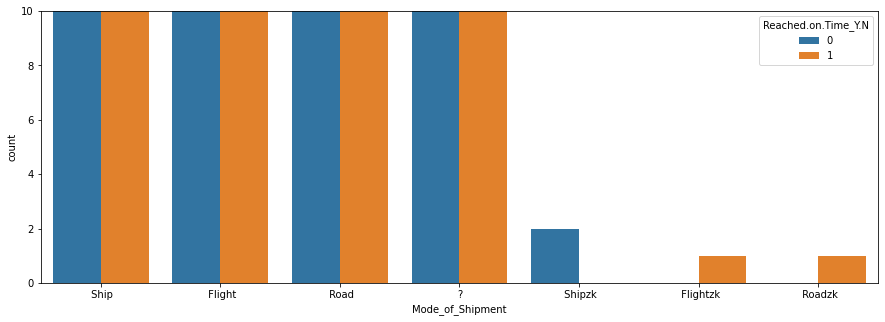

In [36]:
plt.figure(figsize=(15, 5))
plt.ylim(0, 10) # y축의 범위를 0  ~ 10까지로 설정
sns.countplot(data = train,
              x = "Mode_of_Shipment",
              hue = "Reached.on.Time_Y.N"
             );

In [37]:
train["Mode_of_Shipment"].unique()

array([' Ship', ' Flight', ' Road', '?', ' Shipzk', ' Flightzk',
       ' Roadzk'], dtype=object)

In [38]:
test["Mode_of_Shipment"].unique()

array([' Ship', ' Flight', '?', ' Road', ' Shipzk', ' Roadzk'],
      dtype=object)

In [39]:
mode = [' Ship', ' Flight', ' Road', '?', ' Shipzk', ' Flightzk',
       ' Roadzk']
mode

[' Ship', ' Flight', ' Road', '?', ' Shipzk', ' Flightzk', ' Roadzk']

In [40]:
convert_mode = [' Ship', ' Flight', ' Road',] + ["Other"] * 4
convert_mode

[' Ship', ' Flight', ' Road', 'Other', 'Other', 'Other', 'Other']

In [41]:
mode_dict = dict(zip(mode, convert_mode))
mode_dict

{' Ship': ' Ship',
 ' Flight': ' Flight',
 ' Road': ' Road',
 '?': 'Other',
 ' Shipzk': 'Other',
 ' Flightzk': 'Other',
 ' Roadzk': 'Other'}

In [42]:
train["Mode_of_Shipment"] = train["Mode_of_Shipment"].map(mode_dict)

In [43]:
train["Mode_of_Shipment"].tail(70)

ID
6930       Ship
6931       Ship
6932       Ship
6933     Flight
6934     Flight
6935       Ship
6936       Ship
6937       Ship
6938       Ship
6939       Ship
6940       Ship
6941       Ship
6942       Ship
6943       Ship
6944      Other
6945       Ship
6946       Ship
6947       Ship
6948       Road
6949       Road
6950       Road
6951       Road
6952       Road
6953       Ship
6954       Ship
6955     Flight
6956       Ship
6957       Ship
6958       Ship
6959     Flight
6960       Road
6961       Ship
6962       Ship
6963       Ship
6964       Road
6965       Ship
6966       Ship
6967       Ship
6968       Ship
6969       Ship
6970       Ship
6971       Ship
6972       Ship
6973       Road
6974       Road
6975       Ship
6976       Ship
6977     Flight
6978       Ship
6979       Ship
6980       Ship
6981       Ship
6982     Flight
6983       Ship
6984       Ship
6985       Ship
6986       Ship
6987       Road
6988       Ship
6989       Ship
6990       Ship
6991     Flight
6992 

In [44]:
test["Mode_of_Shipment"] = test["Mode_of_Shipment"].map(mode_dict)

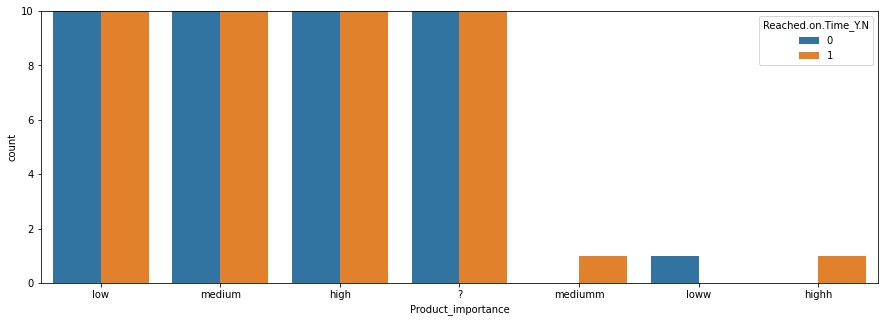

In [45]:
plt.figure(figsize=(15, 5))
plt.ylim(0, 10) # y축의 범위를 0  ~ 10까지로 설정
sns.countplot(data = train,
              x = "Product_importance",
              hue = "Reached.on.Time_Y.N"
             );

In [46]:
train["Product_importance"].unique()

array(['low', 'medium', 'high', '?', 'mediumm', 'loww', 'highh'],
      dtype=object)

In [47]:
test["Product_importance"].unique()

array(['high', 'medium', 'low', '?', 'mediumm'], dtype=object)

In [48]:
product = ['low', 'medium', 'high', '?', 'mediumm', 'loww', 'highh']
product

['low', 'medium', 'high', '?', 'mediumm', 'loww', 'highh']

In [49]:
convert_product = ['low', 'medium', 'high'] + ["Other"] * 4
convert_product

['low', 'medium', 'high', 'Other', 'Other', 'Other', 'Other']

In [50]:
product_dict = dict(zip(product, convert_product))
product_dict

{'low': 'low',
 'medium': 'medium',
 'high': 'high',
 '?': 'Other',
 'mediumm': 'Other',
 'loww': 'Other',
 'highh': 'Other'}

In [51]:
train["Product_importance"] = train["Product_importance"].map(product_dict)

In [52]:
test["Product_importance"] = test["Product_importance"].map(mode_dict)

In [53]:
train.drop("Gender", axis=1, inplace= True)

In [54]:
test.drop("Gender", axis=1, inplace= True)

In [55]:
#train.drop("Weight_in_gms", axis=1, inplace = True)

In [56]:
#test.drop("Weight_in_gms", axis=1, inplace = True)

In [57]:
# train데이터에서 정답 컬럼
y_train = train["Reached.on.Time_Y.N"]
# train데이터에서 정답 컬럼을 삭제한 후 남은 모든 컬럼들
X_train = train.drop("Reached.on.Time_Y.N", axis = 1)
# 맨 처음에 받았던 test.csv
X_test = test

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(6999, 9)
(4000, 9)
(6999,)


In [59]:
X_train["Weight_in_gms"].tail()

ID
6995    2500
6996    2500
6997    2500
6998    2500
6999    2500
Name: Weight_in_gms, dtype: int64

In [60]:
# 원 핫 인코딩
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [61]:
print(X_test.shape)
print(X_train.shape)

(4000, 16)
(6999, 19)


In [62]:
X_train.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Warehouse_block _A', 'Warehouse_block _B', 'Warehouse_block _C',
       'Warehouse_block _D', 'Warehouse_block _F', 'Mode_of_Shipment_ Flight',
       'Mode_of_Shipment_ Road', 'Mode_of_Shipment_ Ship',
       'Mode_of_Shipment_Other', 'Product_importance_Other',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium'],
      dtype='object')

In [63]:
X_test.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Warehouse_block _A', 'Warehouse_block _B', 'Warehouse_block _C',
       'Warehouse_block _D', 'Warehouse_block _F', 'Mode_of_Shipment_ Flight',
       'Mode_of_Shipment_ Road', 'Mode_of_Shipment_ Ship',
       'Mode_of_Shipment_Other', 'Product_importance_Other'],
      dtype='object')

In [64]:
set(X_train.columns) -set(X_test.columns)

{'Product_importance_high',
 'Product_importance_low',
 'Product_importance_medium'}

In [65]:
set(X_test.columns) -set(X_train.columns)

set()

In [66]:
X_train.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Warehouse_block _A', 'Warehouse_block _B', 'Warehouse_block _C',
       'Warehouse_block _D', 'Warehouse_block _F', 'Mode_of_Shipment_ Flight',
       'Mode_of_Shipment_ Road', 'Mode_of_Shipment_ Ship',
       'Mode_of_Shipment_Other', 'Product_importance_Other',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium'],
      dtype='object')

In [100]:
knn_md = KNeighborsClassifier(n_neighbors=10)

In [101]:
result_knn = cross_val_score(knn_md,
                             X_train,
                             y_train,
                             cv = 8
                            )

In [102]:
result_knn.mean()

0.5859423014056881

In [103]:
scaler = StandardScaler()

In [104]:
result_knn_train = scaler.fit_transform(X_train)

In [105]:
result_knn_train

array([[-1.66924921, -0.47621263, -0.38049457, ..., -0.29861179,
         1.04546755, -0.86159447],
       [ 1.08662637, -0.01103298,  0.05161731, ..., -0.29861179,
         1.04546755, -0.86159447],
       [-0.75062402, -0.94139229,  0.07082228, ..., -0.29861179,
         1.04546755, -0.86159447],
       ...,
       [-0.75062402, -0.94139229,  0.41171054, ..., -0.29861179,
         1.04546755, -0.86159447],
       [-0.75062402, -0.94139229,  0.08522601, ..., -0.29861179,
        -0.95650984,  1.16063883],
       [-0.75062402, -0.01103298,  0.2292633 , ...,  3.3488296 ,
        -0.95650984, -0.86159447]])

In [106]:
result_knn_test = scaler.fit_transform(X_test)
result_knn_test

array([[-0.74271618, -0.78863713,  0.3774816 , ...,  0.75366607,
        -0.24298471, -0.14285714],
       [-0.74271618,  0.37726722, -0.4746283 , ...,  0.75366607,
        -0.24298471, -0.14285714],
       [-0.74271618,  0.765902  , -0.44992946, ..., -1.32684758,
        -0.24298471, -0.14285714],
       ...,
       [-0.74271618, -0.01136757, -0.04239864, ..., -1.32684758,
        -0.24298471, -0.14285714],
       [ 1.94422811,  0.37726722,  0.26016212, ...,  0.75366607,
        -0.24298471, -0.14285714],
       [ 1.04858001, -0.78863713,  0.24163799, ...,  0.75366607,
        -0.24298471,  7.        ]])

In [107]:
result_knn_SS = cross_val_score(knn_md,
                                result_knn_train, # 스케일링된 문제데이터
                                y_train,           # 정답 데이터
                                cv = 8
                               )
result_knn_SS

array([0.57485714, 0.56571429, 0.55542857, 0.57714286, 0.54514286,
       0.56457143, 0.54857143, 0.5583524 ])

In [108]:
result_knn_SS.mean()

0.5612226217718208

In [92]:
tree_md = DecisionTreeClassifier(max_depth=3)

In [138]:
result_DT = cross_val_score(tree_md, # 위에서 만든 모델
                            X_train, # 학습용 문제 데이터
                            y_train, # 학습용 정답 데이터
                            cv = 500 # cv = 나눌개수
                           )
result_DT

array([0.85714286, 0.42857143, 0.57142857, 0.71428571, 0.71428571,
       0.64285714, 0.57142857, 0.64285714, 0.64285714, 0.5       ,
       0.57142857, 0.71428571, 0.78571429, 0.57142857, 0.57142857,
       0.78571429, 0.78571429, 0.71428571, 0.71428571, 0.57142857,
       0.78571429, 0.57142857, 0.5       , 0.57142857, 0.64285714,
       0.57142857, 0.57142857, 0.64285714, 0.71428571, 0.35714286,
       0.57142857, 0.35714286, 0.71428571, 0.85714286, 0.57142857,
       0.64285714, 0.5       , 0.71428571, 0.64285714, 0.71428571,
       0.64285714, 0.78571429, 0.57142857, 0.35714286, 0.71428571,
       0.64285714, 0.78571429, 0.71428571, 0.78571429, 0.71428571,
       0.57142857, 0.5       , 0.57142857, 0.64285714, 0.5       ,
       0.57142857, 0.57142857, 0.64285714, 0.64285714, 0.5       ,
       0.57142857, 0.42857143, 0.57142857, 0.71428571, 0.57142857,
       0.64285714, 0.71428571, 0.64285714, 0.42857143, 0.42857143,
       0.71428571, 0.64285714, 0.85714286, 0.64285714, 0.78571

In [139]:
result_DT.mean()

0.6140769230769231

In [115]:
forest_md = RandomForestClassifier(n_estimators=100,
                                   random_state=10)
forest_md


RandomForestClassifier(random_state=10)

In [116]:
result_RF = cross_val_score(forest_md, # 위에서 만든 모델
                            X_train, # 학습용 문제 데이터
                            y_train, # 학습용 정답 데이터
                            cv = 15 # cv = 나눌개수
                           )
result_RF    

array([0.59743041, 0.56531049, 0.5503212 , 0.5738758 , 0.59743041,
       0.58458244, 0.5503212 , 0.58244111, 0.58029979, 0.57939914,
       0.57081545, 0.58798283, 0.62017167, 0.59656652, 0.57296137])

In [117]:
result_RF.mean()

0.5806606562449262

In [121]:
voting_md = VotingClassifier(estimators=[
                                 ("knn1", knn_md),
                                 ("tree1", tree_md),
                                 ("forest1", forest_md),
                                  ],
                                  voting="hard"  #soft, hard
                               )

In [130]:
result_vo = cross_val_score(voting_md,
                                X_train, 
                                y_train,           # 정답 데이터
                                cv = 50
                               )
result_vo

array([0.55714286, 0.64285714, 0.62857143, 0.60714286, 0.57857143,
       0.58571429, 0.57857143, 0.65714286, 0.62142857, 0.58571429,
       0.60714286, 0.63571429, 0.58571429, 0.57142857, 0.58571429,
       0.58571429, 0.59285714, 0.65      , 0.56428571, 0.65714286,
       0.6       , 0.57857143, 0.55      , 0.66428571, 0.62857143,
       0.56428571, 0.6       , 0.57142857, 0.57857143, 0.62857143,
       0.58571429, 0.61428571, 0.6       , 0.59285714, 0.53571429,
       0.5       , 0.64285714, 0.56428571, 0.55      , 0.60714286,
       0.65      , 0.63571429, 0.62857143, 0.57857143, 0.6       ,
       0.62857143, 0.68571429, 0.6       , 0.59285714, 0.62589928])

In [131]:
result_vo.mean()

0.6012322713257965

In [82]:
result_submission = pd.read_csv("data/sampleSubmission.csv")
result_submission

,ID,Reached.on.Time_Y.N
0,7000,NaN
1,7001,NaN
2,7002,NaN
3,7003,NaN
4,7004,NaN
5,7005,NaN
6,7006,NaN
7,7007,NaN
8,7008,NaN
9,7009,NaN


In [83]:
test["Mode_of_Shipment"].unique()

array([' Ship', ' Flight', 'Other', ' Road'], dtype=object)

In [84]:
X_train.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Warehouse_block _A', 'Warehouse_block _B', 'Warehouse_block _C',
       'Warehouse_block _D', 'Warehouse_block _F', 'Mode_of_Shipment_ Flight',
       'Mode_of_Shipment_ Road', 'Mode_of_Shipment_ Ship',
       'Mode_of_Shipment_Other', 'Product_importance_Other',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium'],
      dtype='object')

In [85]:
X_test.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Warehouse_block _A', 'Warehouse_block _B', 'Warehouse_block _C',
       'Warehouse_block _D', 'Warehouse_block _F', 'Mode_of_Shipment_ Flight',
       'Mode_of_Shipment_ Road', 'Mode_of_Shipment_ Ship',
       'Mode_of_Shipment_Other', 'Product_importance_Other'],
      dtype='object')

In [86]:
tree_md.fit(X_train, y_train) 
pre = tree_md.predict(X_test)   
pre 

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
result_submission["Reached.on.Time_Y.N"] = pre

In [ ]:
result_submission.to_csv("sampleSubmission_tree.csv", index=False)